In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Documents/CSV/diminos_data.csv')
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [ ]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [ ]:
df['delivery_time_min'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds().div(60).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
 3   delivery_time_min   15000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 468.9 KB


In [ ]:
df['placed_on'] = df['order_placed_at'].dt.dayofweek
df['placed_day'] = df['order_placed_at'].dt.day_name().str.lower()
df['delivered_on'] = df['order_delivered_at'].dt.dayofweek
df['delivered_day'] = df['order_delivered_at'].dt.day_name().str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
 3   delivery_time_min   15000 non-null  float64       
 4   placed_on           15000 non-null  int64         
 5   placed_day          15000 non-null  object        
 6   delivered_on        15000 non-null  int64         
 7   delivered_day       15000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 937.6+ KB


In [ ]:
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time_min,placed_on,placed_day,delivered_on,delivered_day
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,2,wednesday,2,wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,2,wednesday,2,wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,2,wednesday,2,wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,2,wednesday,2,wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,2,wednesday,2,wednesday


In [ ]:
df['delivery_time_min'].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time_min, dtype: float64

<Axes: >

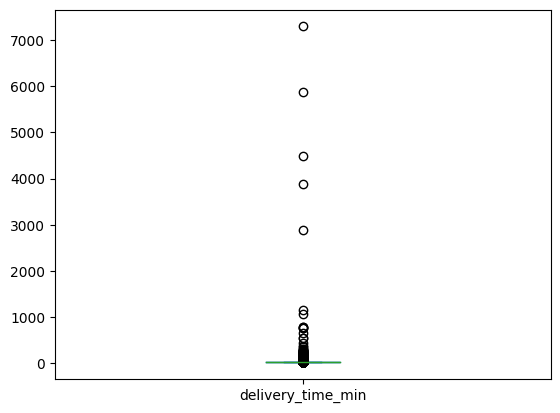

In [ ]:
df['delivery_time_min'].plot(kind='box')

In [ ]:
df['delivery_time_min'].quantile(0.95)

27.261043996666658

In [ ]:
above_31 = len(df[df['delivery_time_min'] > 31])
print(above_31)
print(above_31/len(df)*100)

557
3.713333333333333


In [ ]:
above_1d = len(df[df['delivery_time_min'] > 1440])
print(above_1d)
print(above_1d/len(df)*100)

5
0.03333333333333333


I believe it's safe to assume those orders are placed in advance. Since it's small, these orders will be ignored.

In [ ]:
df_sameday = df[df['delivery_time_min'] < 1440]
df_sameday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14995 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            14995 non-null  int64         
 1   order_placed_at     14995 non-null  datetime64[ns]
 2   order_delivered_at  14995 non-null  datetime64[ns]
 3   delivery_time_min   14995 non-null  float64       
 4   placed_on           14995 non-null  int64         
 5   placed_day          14995 non-null  object        
 6   delivered_on        14995 non-null  int64         
 7   delivered_day       14995 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 1.0+ MB


In [ ]:
df_sameday['delivery_time_min'].describe()

count    14995.000000
mean        18.877367
std         23.644894
min         15.000010
25%         15.274716
50%         15.797384
75%         17.277233
max       1152.794242
Name: delivery_time_min, dtype: float64

In [ ]:
df_sameday['delivery_time_min'].quantile(0.95)

27.133922889999997

## Overall delivery insights
- Only 5 orders were delivered after 1 day, so they are assumed to be advance orders.
- 95% of same day orders were delivered within 27 minutes.
- Average delivery time on same day is 18 minutes.
- Almost 4% of the orders were delivered after 31 minutes.
- The store should pass Dimino's inspection.

## Next Up
- Analysis of order incoming and delivery time wrt day of week

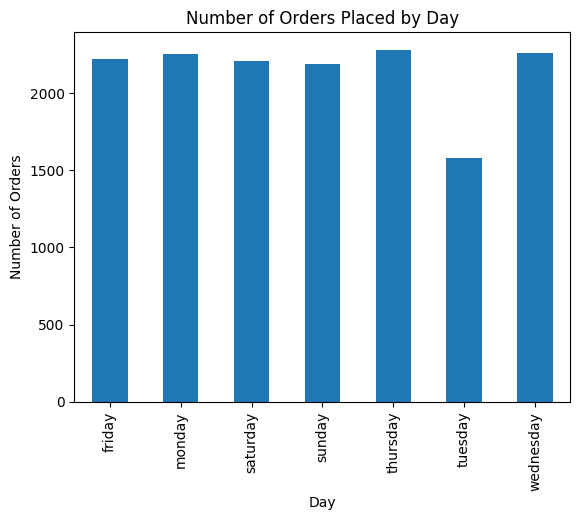

In [ ]:
orders_by_day = df_sameday.groupby("placed_day")["order_id"].count()
orders_by_day.plot(kind="bar")
plt.xlabel("Day")
plt.ylabel("Number of Orders")
plt.title("Number of Orders Placed by Day")
plt.show()

In [ ]:
print('tue', orders_by_day.min())
print('thu', orders_by_day.max())

tue 1582
thu 2280


Thursday recieves the most orders while Tuesday recieves the least

## Avg delivery time per day

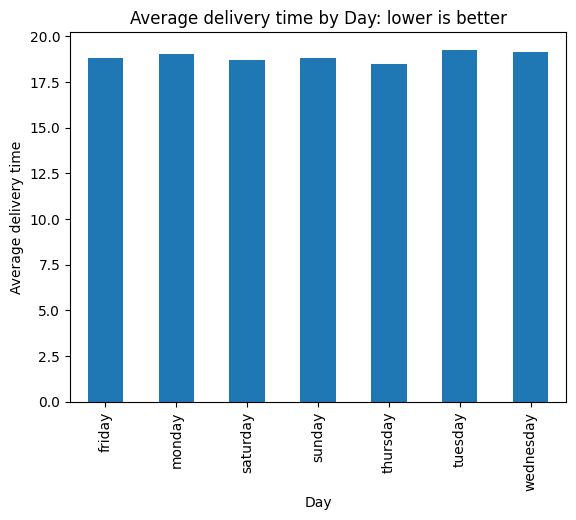

In [ ]:
means_by_day = df_sameday.groupby("placed_day")["delivery_time_min"].mean()
means_by_day.plot(kind="bar")
plt.xlabel("Day")
plt.ylabel("Average delivery time")
plt.title("Average delivery time by Day: lower is better")
plt.show()

The store is consistent with its delivery time across the week.

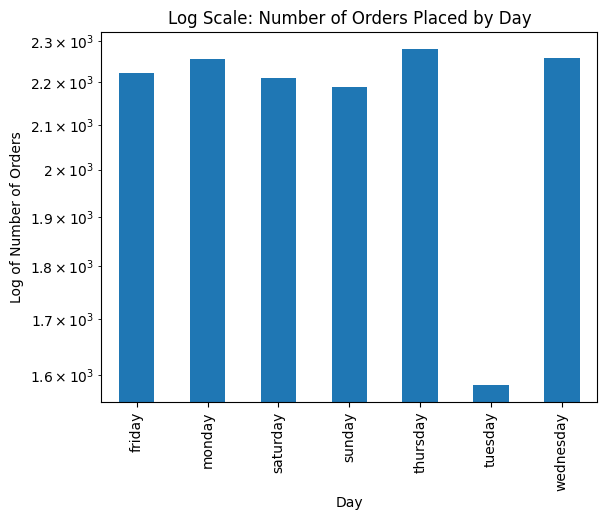

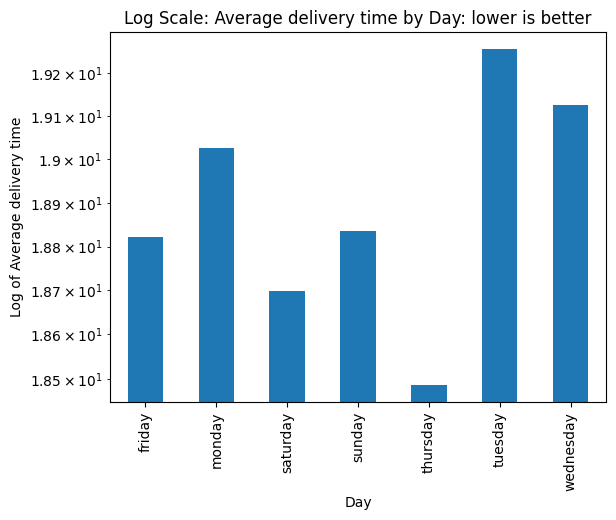

In [ ]:
orders_by_day = df_sameday.groupby("placed_day")["order_id"].count()
ax = orders_by_day.plot(kind="bar")
ax.set_yscale('log')
plt.xlabel("Day")
plt.ylabel("Log of Number of Orders")
plt.title("Log Scale: Number of Orders Placed by Day")
plt.show()

means_by_day = df_sameday.groupby("placed_day")["delivery_time_min"].mean()
ax = means_by_day.plot(kind="bar")
ax.set_yscale('log')
plt.xlabel("Day")
plt.ylabel("Log of Average delivery time")
plt.title("Log Scale: Average delivery time by Day: lower is better")
plt.show()

With the differences heightened by a log scale, we can see clearly.
- note how on days with higher order counts, delivery time is less.